In [25]:
import pandas as pd
from datetime import datetime
import psycopg2
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

In [26]:
param_dic = {
    "host"      : "localhost",
    "database"  : "mood_logger",
    "user"      : "new",
    "password"  : "123"
}

conn = None
try:
    # connect to the PostgreSQL server
    print('Connecting to the PostgreSQL database...')
    conn = psycopg2.connect(**param_dic)
except (Exception, psycopg2.DatabaseError) as error:
    print(error)
print("Connection successful")

Connecting to the PostgreSQL database...
Connection successful


In [27]:
df=pd.read_sql("SELECT * FROM logs",conn, parse_dates=['timestamp'])
df

,id,name,mood,timestamp
0,1,test,5,2022-01-04 22:11:12.749585
1,2,Ben,4,2022-01-05 18:57:48.393418
2,3,ayushmaan,3,2022-01-05 22:18:35.309670
3,4,ritvik,5,2022-01-05 22:18:45.756062
4,5,ayushmaan,3,2022-01-05 22:18:56.160092
...,...,...,...,...
66,67,ritvik,4,2022-01-06 20:48:17.844855
67,68,ritvik,1,2022-01-06 20:48:43.840765
68,69,ayushmaan,1,2022-01-06 20:50:48.241191
69,70,ayushmaan,4,2022-01-07 10:03:44.442759


## Average mood daily of a user

In [28]:
df["Day"] = df[(df['name']=='ritvik')]['timestamp'].dt.date
day_avg=df.groupby(['Day']).mean()
day_avg

,id,mood
Day,,
2022-01-05,4.00000,5.0000
2022-01-06,45.65625,2.9375


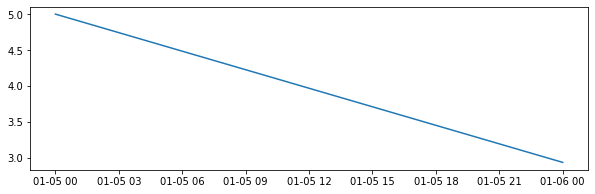

In [29]:
plt.figure(figsize=(10,3))
plt.plot(day_avg.index,day_avg['mood'])

## Pie chart

In [30]:
new = df[df['name']=='ayushmaan'].groupby(['mood']).mean().reset_index()
new

,mood,id
0,1,25.000000
1,2,23.600000
2,3,28.250000
3,4,37.545455
4,5,10.500000


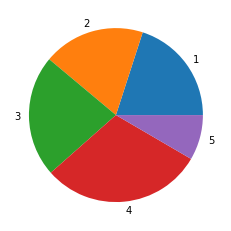

In [31]:
plt.pie(new['id'],labels=new['mood'])
plt.show()

In [33]:
fig_pie = px.pie(df, values='id', names='mood')

plotly.graph_objs._figure.Figure